# Principal Component Analysis

$$
 \begin{equation}
\underbrace{\mathbf{A}}_{W \times D} = \underbrace{\mathbf{U}}_{W \times W} \times \underbrace{\mathbf{\Sigma}}_{W\times D} \times \underbrace{\mathbf{V}^{\text{T}}}_{D \times D}
\end{equation}
$$

In [14]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
cancer = load_breast_cancer()

In [15]:
data = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data["label"] = cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


"PCA assumes that the dataset is centered around the origin. As we will see, Scikit-Learn’s PCA classes take care of centering the data for you. If you implement PCA yourself (as in the preceding example), or if you use other libraries, don’t forget to center the data first."

In [132]:
def compute_svd(data):
    val = data.drop("label",axis=1).values
    val = val - val.mean()
    U, sigma, V = np.linalg.svd(val,full_matrices=False)
    return val.dot(V.T[:,:2])

In [133]:
dim2 = compute_svd(data)

Text(0.5, 1.0, 'First Two Principal Components of a 30 Dimensional Dataset ')

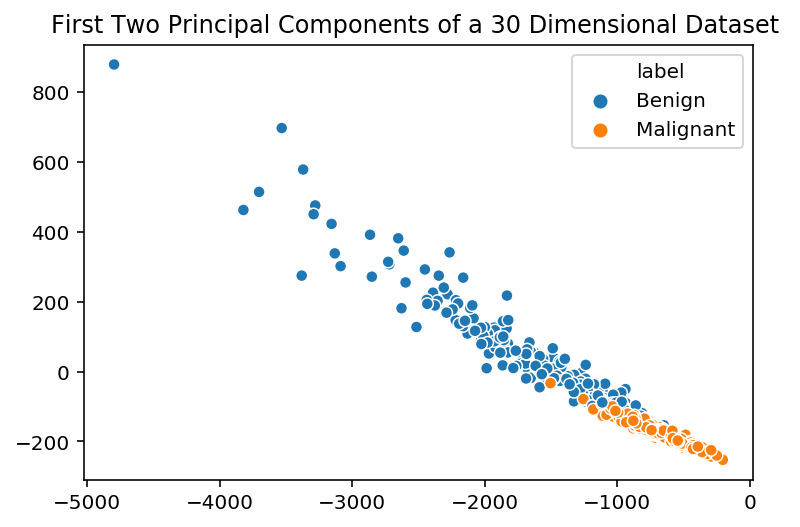

In [136]:
sns.scatterplot(dim2[:,0],dim2[:,1],hue = data.label.map({1:"Malignant", 0:"Benign"}))
plt.title("First Two Principal Components of a 30 Dimensional Dataset ")
# plt.ylim(-600, 800)
# plt.xlim(-1000, 4000)

# Sklearn PCA

```python
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

```

In [25]:
from sklearn.decomposition import PCA

In [89]:
pca = PCA(n_components=2)
x = data.drop("label",axis=1).values
new = pca.fit_transform(x)

Text(0.5, 1.0, 'First Two Principal Components of a 30 Dimensional Dataset ')

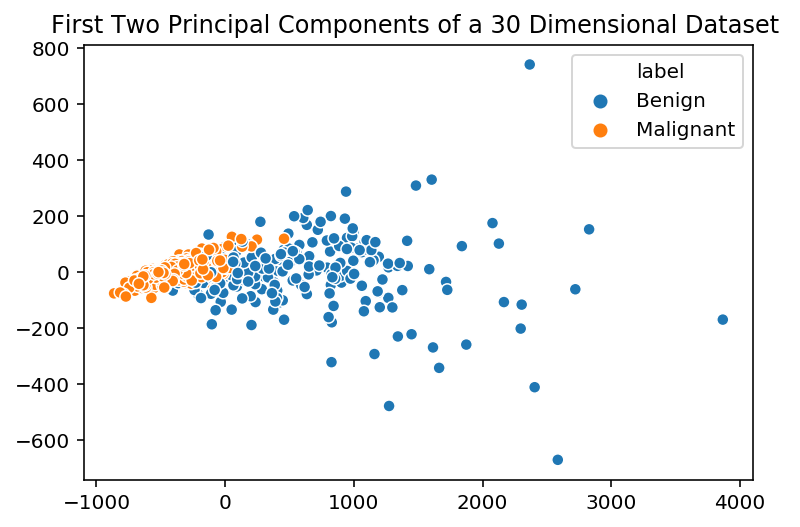

In [88]:
sns.scatterplot(new[:,0],new[:,1],hue = data.label.map({1:"Malignant", 0:"Benign"}))
plt.title("First Two Principal Components of a 30 Dimensional Dataset ")


In [90]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(x)

Text(0.5, 1.0, 'First Two Principal Components of a 30 Dimensional Dataset ')

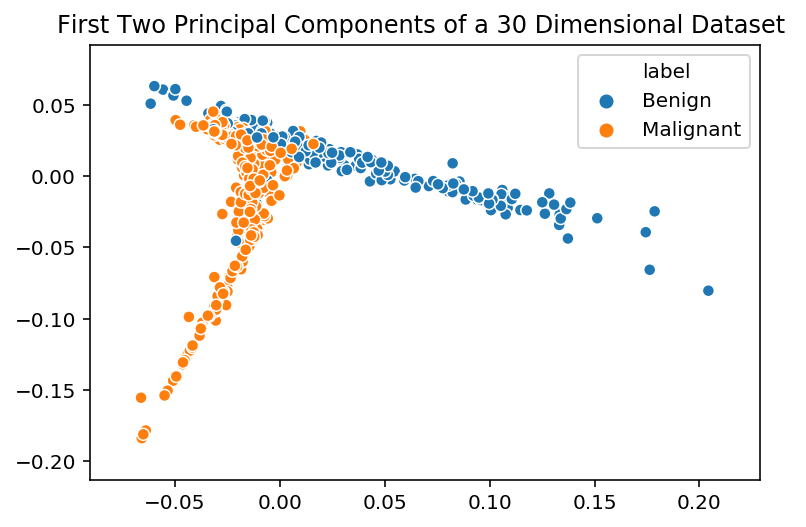

In [93]:
sns.scatterplot(X_reduced[:,0],X_reduced[:,1],hue = data.label.map({1:"Malignant", 0:"Benign"}))
plt.title("First Two Principal Components of a 30 Dimensional Dataset ")
